# Model tuning

How do the results change if we change some parameters of the model?

In [1]:
%run imports.py
from modelinter.preprocessing.imports_load_data import read_csvs, extract_arrays
raw_data = read_csvs()

/home/orazio/.virtualenvs/model_interconnectedness_36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


we will now change the number of days we train the model on, and see how the results change. This is basically a huge loop containing the whole code from previous notebook.

The logic for this loop is contained in `sample_day_loop`

In [2]:
from modelinter.models.constants import Paths, Const
from modelinter.models.utils import Pkl
from modelinter.models.calculations import sample_day_loop, DefaultSettings_testdays
from os.path import isfile

In [3]:
# let's take a sample every 30 days for 4 years
days_change = list(range(-int(3 * Const.WHOLE_YEAR.value / 4),
                         5 * Const.WHOLE_YEAR.value,
                         30))
savefile = 'days_change' + Paths.PKL_EXT.value

In [4]:
# if results have already been calculated and saved:
if (isfile(Paths.SAVE_DIR.value + savefile)
    and not DefaultSettings_testdays.recalculate_results):
    # load pickled results
    results = Pkl.load(Paths.SAVE_DIR.value + savefile)
else:
    # sample the results
    results = sample_day_loop(raw_data, DefaultSettings_testdays, days_change)
    if DefaultSettings_testdays.save_results:
        # pickle results
        Pkl.save(results,
                 Paths.SAVE_DIR.value + savefile)

Let's load the results and plot them. How does expected value change if I change the number of days used to train the model?

For a 3d plot, we need the timestamps for the CCAR scenario, let's extract them

In [5]:
from modelinter.models.calculations import eval_PGM, extract_scenario
arrays = extract_arrays(raw_data)
PGM = eval_PGM(arrays, DefaultSettings_testdays)
scenario = extract_scenario(arrays=arrays,
                            raw_data=raw_data,
                            options_model=PGM.PGM_options_A,
                            settings=DefaultSettings_testdays)
t = scenario.t

3d plot

In [11]:
from modelinter.models.model_tuning import plot_days_3d, plot_days
from modelinter.models.utils import show_figure
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


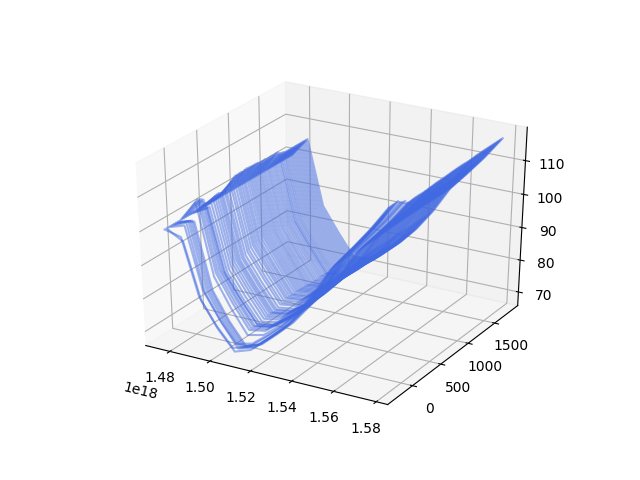

In [9]:
fig = plot_days_3d(t, days_change, results)
show_figure(fig, nb=True)

Let's make a more readable plot.

<IPython.core.display.Javascript object>


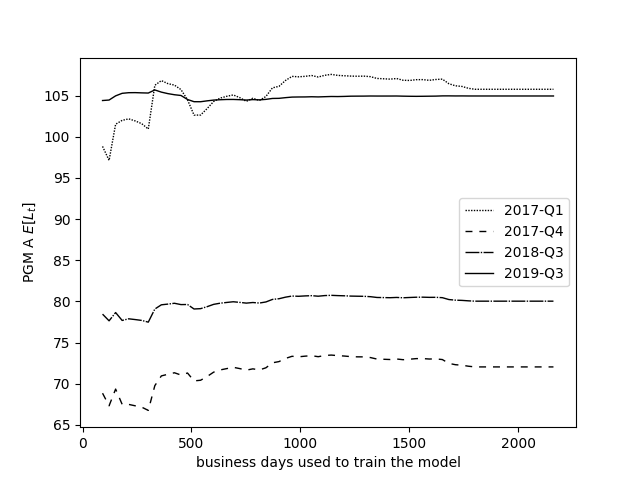

In [12]:
fig, ax = plt.subplots()
plot_days(ax, t, results, days_change)
show_figure(fig, nb=True)

Notice how we get fluctuations in the range of 5%, and up to 7-8%, for the portfolio value, as we change this simple parameter.

The convergence in the end is intuitively expected, since, adding a day to the analysis when you've got 100 days is much more influential than adding a day when you have 1000.